In [51]:
#import Dependencies 

#matplot
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.plotting import table
import os
import seaborn as sns
import plotly as py

#import password
from config import password

#SQLAlchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [52]:
df = pd.read_csv(os.path.join("..", "data", "Teams.csv"))
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.head(1000)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1938,NL,CHN,CHC,NaN,1,154,77.0,89,63,...,151,0.978,Chicago Cubs,Wrigley Field,951640.0,103,101,CHC,CHN,CHN
996,1938,NL,CIN,CIN,NaN,4,151,77.0,82,68,...,133,0.972,Cincinnati Reds,Crosley Field,706756.0,98,97,CIN,CIN,CIN
997,1938,AL,CLE,CLE,NaN,3,153,76.0,86,66,...,145,0.974,Cleveland Indians,League Park II/Cleveland Stadium,652006.0,98,97,CLE,CLE,CLE
998,1938,AL,DET,DET,NaN,4,155,79.0,84,70,...,172,0.976,Detroit Tigers,Briggs Stadium,799557.0,107,106,DET,DET,DET


Text(0.5, 1, 'Games Vs Wings')

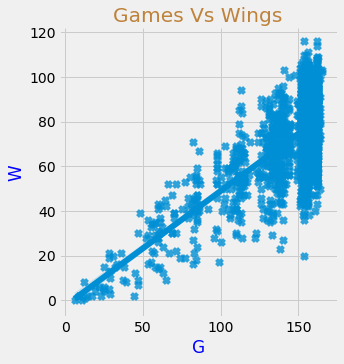

In [53]:
sns.lmplot("G", "W", data=df, markers="x")
plt.xlabel("G",color='blue')
plt.ylabel("W",color='blue')
plt.title("Games Vs Wings", color='#BE823A')

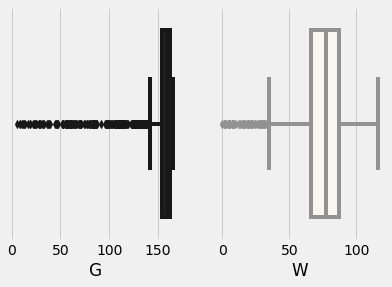

In [54]:
fig = plt.figure()

plt.subplot(1, 2, 1)
sns.boxplot(df["G"],color='#361F1B')
plt.xlabel("G")

plt.subplot(1, 2, 2)
sns.boxplot(df["W"],color='#fbf7ed')
plt.xlabel("W")

plt.show()

## Create a connection to SQL 

In [55]:
pg_user = 'postgres'
pg_password = password
db_name = 'baseball_analysis'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

In [60]:
engine.table_names()

['Batting', 'People', 'Pitching', 'Salaries', 'Teams']

In [58]:
#write to sql
df.to_sql(name = "Teams", con=engine, if_exists='append', index=False)

In [59]:
#confirm data has been loaded to sql table
pd.read_sql_query('select * from Teams', con=engine).head()

ProgrammingError: (psycopg2.errors.UndefinedTable) relation "teams" does not exist
LINE 1: select * from Teams
                      ^

[SQL: select * from Teams]
(Background on this error at: http://sqlalche.me/e/f405)